<div style="background-color:#009440; padding: 0px; background-size:cover; background-opacity:50%; border-radius:5px; height:300px">
    <div style="margin: 5px; padding: 10px;">
    <h1 style="color:#00000">Geophysical Data Acquisition and Analysis</h1>
    <h5 style="color:#C0C0C0">LMU, summer 2023</h5>
    <h4 style="color:rgba(0,0,0,0.6)">Heiner Igel, Joachim Wassermann</h4>
    </div>
    <div style="float:right; margin: 20px; padding: 20px; background:rgba(255,255,255,0.7); width: 70%; height: 100px">
        <div style="position:relative; top:40%; transform: translateY(-50%)">
        <div style="font-size: x-large; font-weight:900; color:rgba(0,0,0,0.8); line-height:100%">P2.4 - Final exam report </div>
        </div>
    </div>
   
</div>

## Rules + deadline

In the following you find five exercises plus some basic code. Adapt the code as needed to answer the questions and provide your answers in separate markdown cells below the exercise. Please, do not forget to label axes, lines, titles, etc in your plot. <br>
Please, make sure that your answers are as elaborate and detailed as necessary to make your answer clear. However, concentrate on the essentials. 

In case, you refer to literature/sources outside the course material, do not forget to acknowledge/cite it properly. You are allowed to also include images from outside the notebook if that may help you to explain. Please, do not forget to provide us with the image files then. This is how you import figures: 

`<img style="float: left; height: 350px; padding: 10px" src="DATA/figure.jpg"/>`

For help in coding, please, consult the NB of the practicals and the official [Python](http://docs.python.org/) and [ObsPy](http://docs.obspy.org) documentation. If these helps do not solve your problem, contact one of the lecturers.  
For help in formating the markdown cells, you can find help e.g. at the webpage of [wikipedia](https://en.wikipedia.org/wiki/Markdown) or on the [cheat sheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). In case of severe problems, please, contact us in time.

Please, submit your final notebook via mail to Heiner Igel (igel@geophysik.uni-muenchen.de) latest 

### Sunday 20th 2023, 12:00am (noon) !

Notebooks received after that time will not be considered.

*Please, do not forget to execute Cell 0 first!*



___

## Name:  
## Matrikel number:  

___



In [1]:
# Cell 0: Preparation for programming
%matplotlib inline

# alternative: interactive notebook backend
#%matplotlib notebook

import warnings
warnings.filterwarnings('ignore')                  # do not show warnings
from __future__ import print_function
from scipy import interpolate, signal
from obspy import read, UTCDateTime, Stream, Trace
from obspy.clients.fdsn import Client
from obspy.signal.cross_correlation import xcorr_pick_correction
import numpy as np
import matplotlib.pylab as plt
import os
import glob

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 10
plt.rcParams['figure.dpi'] = 72
plt.rcParams['lines.linewidth'] = 1

______________

## Exercise 1

In this exercise you will work on broadband data from the Mw8.2 Chile earthquake from 1st of April 2014 at 23:46:47 UTC recorded at the Black Forest Observatory (`BFO`) in SW Germany which is part of the German Regional Seismic Network (`GR`). The goal of this exercise is to show your understanding of the principal basics in signal processing. Answer the following questions and perform the necessary steps in the corresponding code cells.

**a)** In `cell 1a` we fetch the waveforms via the FDSN client of BGR in Hanover and remove the instrument characteristic of the data (no further coding necessary here). We also fetch the event information. Explain what "removing the instrument response" means and why it is necessary. Which mathematical method do you connect with this step? What is to consider during instrument response removal? A hint is given by the options used for removing the instrument response. Comment on all of them.

**b)** Now that you have downloaded the data and removed the instrument response, which further steps do you need to perform for pre-processing (assuming you want to analyse the data in the frequency domain later on)? Assume that for your scientific task the highest frequency you want to analyse is 5Hz and that the processing workflow will eventually be applied to a large amount of data. Describe the general pre-processing chain and point out the possible pitfalls, their reasons, and how to avoid them. 

**c)**: Try to plot the ray paths for this specific earthquake-receiver pair. Identify which phases should theoretically be visible in the seismogram. Try to plot them along with the waveform to see if they can be seen in the seismogram.
Help for coding can be found [here](https://docs.obspy.org/packages/obspy.taup.html?highlight=taup#module-obspy.taup) and [here](https://docs.obspy.org/packages/autogen/obspy.taup.tau.TauPyModel.get_ray_paths.html?highlight=get%20ray%20path#obspy.taup.tau.TauPyModel.get_ray_paths).

3 Trace(s) in Stream:
GR.BFO..BHE | 2014-04-01T23:46:47.019536Z - 2014-04-02T02:46:47.019536Z | 20.0 Hz, 216001 samples
GR.BFO..BHN | 2014-04-01T23:46:47.019536Z - 2014-04-02T02:46:47.019536Z | 20.0 Hz, 216001 samples
GR.BFO..BHZ | 2014-04-01T23:46:47.019536Z - 2014-04-02T02:46:47.019536Z | 20.0 Hz, 216001 samples


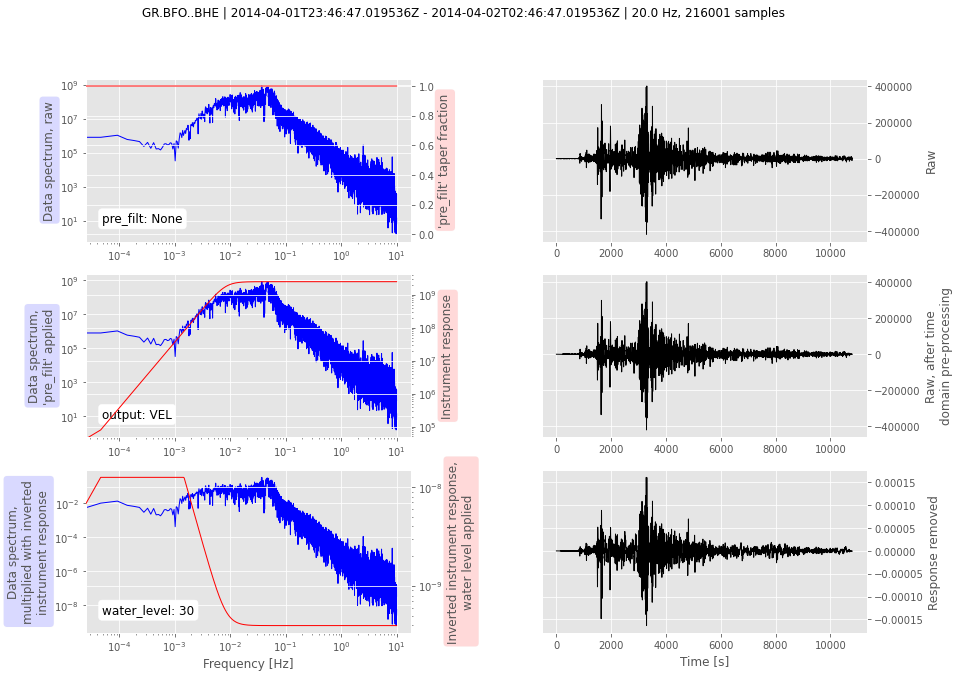

In [2]:
# Cell 1a : getting the waveforms, station inventory and event information
from obspy.clients.fdsn import Client

client_bgr = Client("BGR")
client_usgs = Client("USGS")

origin_time = UTCDateTime("2014-04-01T23:46:47")

st = client_bgr.get_waveforms("GR", "BFO", "*", "BH?", origin_time, origin_time + (180 * 60))
inventory = client_bgr.get_stations(network='GR', station='BFO', channel='BH?', level='response')
event = client_usgs.get_events(minmagnitude=8, starttime=origin_time - 100, endtime=origin_time + 100)[0]

print(st)

plot = True
for i, tr in enumerate(st):
    # only plot the response removal for one trace..
    if i > 0:
        plot = False
    tr.remove_response(inventory=inventory, output="VEL", pre_filt=None, water_level=30,
                       zero_mean=True, taper=True, taper_fraction=0.05, plot=plot)

In [ ]:
# Cell 1b: pre-processing the data

# take a copy of the stream to avoid overwriting the original data
bfo = st.copy()



In [ ]:
# Cell 1c - part 1: plot of ray pathes for this EQ-receiver pair

# loading some necessary package as a hint ...
from obspy.taup import TauPyModel


In [ ]:
# Cell 1c - part 2: plot seismogram with theoretical travel times

# loading some necessary package as a hint ...
import matplotlib.pylab as plt


### Answer to exercise 1

...

## Exercise 2 : Noise Evaluation - Spectral Analysis and I95-Estimation

### a) PPSD
 * read waveform data from file `BW.BDGS..BHN.D.2016.035`
 * read corresponding station metadata from file `BW_inventory.xml` (the XML files contains most of Bavarias network stations metadata - select the right one).
 * print info on both waveforms and station metadata
 * (if `cartopy` package is installed) plot location of station using the inventory's `plot()` method

In [ ]:
# TODO: read data, print info, plot inventory
from obspy import *
import numpy as np
import matplotlib.pylab as plt



 * compute probabilistic power spectral densities using `PPSD` class from obspy.signal, see http://docs.obspy.org/tutorial/code_snippets/probabilistic_power_spectral_density.html (but use the inventory you read from StationXML as metadata)
 * plot the processed `PPSD` (`plot()` method attached to `PPSD` object)

In [ ]:
# TODO: compute PPSD from data
from obspy.signal import PPSD


Since longer term stacks would need too much waveform data and take too long to compute, I prepared two years continuous data preprocessed for 2 stations on three channels each to play with..

 * `FUR`: LMU geophysical observatory in Fürstenfeldbruck
 * `ROTZ`: Rotzenmühle, low-noise station in Bavarian network)


 * load long term pre-computed PPSD from one of the files `PPSD_(FUR|ROTZ)_(H,E)H?.npz` using `PPSD`'s `load_npz()` staticmethod (i.e. it is called directly from the class, not an instance object of the class)
 * plot the PPSD (default is full time-range, depending on how much data and spread is in the data, adjust `max_percentage` option of `plot()` option)
 * do a cumulative plot (which is good to judge non-exceedance percentage dB thresholds)

In [ ]:
# TODO: load PPSD from a .npz file
FURP = 
ROTZP = 


In [ ]:
# TODO: plot the PPSD loaded above


 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * nighttime stack, daytime stack
 * (Gold card members: Use the `callback` option and use some crazy custom callback function in `calculate_histogram()`, e.g. stack together all data from birthdays in your family.. or all German holidays + Sundays in the time span.. or from dates of some bands' concerts on a tour.. etc.)

In [ ]:
# TODO: do specific histogram stacks and plot, compare differences qualitatively


 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * weekdays stack, weekend stack

In [ ]:
# TODO: do specific histogram stacks and plot, compare differences qualitatively


 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * seasonal stacks (e.g. northern hemisphere autumn vs. spring/summer, ...)

In [ ]:
# TODO: do specific histogram stacks and plot, compare differences qualitatively



 * do different stacks of the data using the [`calculate_histogram()` (see docs!)](http://docs.obspy.org/packages/autogen/obspy.signal.spectral_estimation.PPSD.calculate_histogram.html) method of `PPSD` and visualize them
 * compare differences in different frequency bands qualitatively (anthropogenic vs. "natural" noise)..
   * stacks by specific month
   * maybe even combine several of above restrictions.. (e.g. only nighttime on weekends)

In [ ]:
# TODO: do specific histogram stacks and plot, compare differences qualitatively


### Answer a)
....

### b) I95
 
 A very simple alternative to evaluate the noise condition at a specific site is to estimate the 95% quartile of amplitudes in a pre-defined frequency band and time window. For further information of this method we refer to Groos and Ritter, (2009) https://academic.oup.com/gji/article-pdf/179/2/1213/5996922/179-2-1213.pdf
 
 * read waveform data from file `noise_UH2_EHZ.mseed`
 * read station metadata from file `station_UH2.stationxml`
 * print info on waveforms

In [ ]:
# TODO: read data, print info, plot inventory


 * work with a copy of the first trace in the stream
 * use inventory with the trace's [`remove_response(..) (see docs!)`](http://docs.obspy.org/packages/autogen/obspy.core.trace.Trace.remove_response.html) method to remove the frequency response from the data (use `plot=True` to visualize what is going on in frequency domain), going to ground velocity (ending up in `m/s`)
 * after instrument correction filter to a frequency band of choice (usually something like 0.5-20 Hz for local to regional event detection)

In [ ]:
# TODO: remove response, filter


 * multiply the trace's underlying data array with `1e9` to get to `nm/s`
 * use numpy's `abs()` and `percentile()` functions, to compute the 95th percentile of absolute values in the data (due to the response removal and filtering the data should already be zero-mean -- which is of course a requirement)
 * print the I95 value of the 3 hours of data

In [ ]:
# TODO: calculate and print I95 of data


 * here we do the I95 calculation in a smaller moving window over time to get some statistics...

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# import seaborn
from obspy import read, read_inventory

st = read("data/noise_UH2_EHZ.mseed")
inv = read_inventory("data/station_UH2.stationxml")

tr = st[0]

tr.remove_response(inventory=inv, output="VEL", water_level=10, pre_filt=[0.1, 0.3, 70, 100])
tr.filter("bandpass", freqmin=0.5, freqmax=20)

t = tr.stats.starttime
# 10 minute moving window
step = 10 * 60
i95_list = []

while t + step < tr.stats.endtime:
    data = np.abs(tr.slice(t, t+step)) * 1e9
    i95 = np.percentile(data, 95)
    i95_list.append(i95)
    t += step

plt.figure()
try:
    import seaborn
except ImportError:
    plt.violinplot(i95_list)
else:
    seaborn.violinplot(i95_list, orient="v", cut=0)
plt.ylabel("I95 [nm/s]")
plt.figure()
plt.plot(i95_list)
plt.xlabel("moving windows\n({} -- {})".format(
    tr.stats.starttime.strftime("%F %r"), tr.stats.endtime.strftime("%F %r")))
plt.ylabel("I95 [nm/s]")
plt.tight_layout()
plt.show()

### Give a statement about the performance of this station. What is the advantage, what the disadvantage of I95 in comparison to the PSD estimate?

#### Answer:



## Exercise 3 : Estimating the effect of wind turbines 

We use in the following a couple of methods defined in src/i_95.py. You are asked to use different smoothing values for estimating the I95 in a frequency band between 1 - 20 Hz for data recroded at station VIEL (NE-Bavaria).

Use the I95SDSClient to estimate the I95 values with different smoothing parameters and plot the result using the i95 plotting function. Use the matplotlib twin plotting option to plot also the wind speed which was recorded at station Hof. What do you see? Use the numpy cross-correlation functionality to estimate possible dependencies between the different data sets. What easy tool you can use in order to see if a linear relationship exists between the two data traces? 


In [ ]:
# rsync test data with:
# $ rsync -a vesuv:/bay200/I95_1-20Hz_merged /tmp
#
# or use /bay200/I95_1-20Hz_merged
%matplotlib nbagg

import sys
from obspy import UTCDateTime
sys.path.append('./src/')
from i95_sds import I95SDSClient



i95_sds_root = './data/'

i95_client = I95SDSClient(i95_sds_root)

In [ ]:
# Loading also wind data
start = UTCDateTime(2013, 5, 7)
end = UTCDateTime(2021, 5, 7)

datum = []
wind = []
wind_max = []

fh = open("data/produkt_klima_tag_19470101_20211231_02261.txt","r")
line = fh.readline()
while 1:
    line = fh.readline()
    if not line: break;
    data = line.split(";")
    datum.append(data[1])
    wind.append(float(data[4]))
    wind_max.append(float(data[3]))

start_str = "%04d%02d%02d"%(start.year,start.month,start.day)
end_str = "%04d%02d%02d"%(end.year,end.month,end.day)
times = []

starty = start
while starty < end:
    times.append(starty.matplotlib_date)
    starty = starty + 24*3600

windm = wind[datum.index(start_str):datum.index(end_str)]

In [ ]:
nslc = [
    ('BW', 'VIEL', '', 'EHZ'),
    ('BW', 'VIEL', '', 'EHN'),
    ('BW', 'VIEL', '', 'EHE'),
    ]

grouped = {}
for n, s, l, c in nslc:
    netstaloc = '.'.join((n, s, l))
    grouped.setdefault(netstaloc, []).append((n, s, l, c))

In [ ]:
i95_client = I95SDSClient(
    i95_sds_root,
    smoothing_step_hours=,
    smoothing_window_length_hours=,
    smoothing_valid_percentage=,
    smoothing_percentile=,
    smoothing_mean=)

fig, ax = i95_client.plot_all_data(start, end, type='line', nslc=nslc, scale='nm/s')
ax1 = ax.twinx()
#ax1.plot(times,windm,color="red",linestyle="dotted",linewidth=1,label="Average Wind HoherPeisenberg")
ax1.fill_between(times, windm, 0,
                 facecolor="red", # The fill color
                 color='red',linestyle="dotted",linewidth=1,label="Average Wind Hof",
                 alpha=0.2)          # Transparency of the fill
ax1.set_ylim(bottom=0,top=10)

ax1.legend(loc=3)
fig.tight_layout() 
outfile = '../eval_noise/i95_line_%s-%s'%(start.year,end.year)
fig.savefig(outfile + '_{}.png'.format(netstaloc.replace('.', '_')))

#### Answer a) ...   

#### Answer b) ...


_______________________

## Exercise 3

This question is about convolution of signals. You are provided with two signals. 

a) What is a convolution? Convolution is closely connected to a special kind of system. Which one? Describe the connection. <br> 
Using [signal.convolve](http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html) convolve the two signals in Cell 3a. Set the mode='same'. Explain the meaning of the mode parameter. <br>
Plot the original signals and the convolved signal. Be careful to plot the entire signal on both the x and y axes. Include labels. Are convolutions commutative? 

b) In cell 3c, convolve the signals win and sig in the reverse order, continuing to use mode='same'. Replot. <br>
Are the results the same or different from cell 2a? Explain this result. Explain any inconsistencies.

c) Bonus: Amend the signals so that convolving them in the reverse order gives the same result as convolving them in original order. Hint: There are two possible solutions to do that.

In [ ]:
#Cell 3a - convolving two signals + plotting

# make a box car function
sig = np.repeat([0., 1., 0.], 100)
# make a Hann window 
win = signal.hann(50)

# convolve the signals





In [ ]:
# Cell 3b - convolution in reverse order + plotting

# make a box car function
sig = np.repeat([0., 1., 0.], 100)
# make a Hann window 
win = signal.hann(50)

# convolve the signals IN REVERSE ORDER





In [ ]:
# Cell 3c - amend signals and convolve again (bonus)






### Answer to exercise 3

a) ...  

b) ...  

c) ...


__________________

## Exercise 4


In Cell 4a theoretical gravity data, modeled for the location in Wettzell, are loaded. The data show a superposition of tidal effects due to different celestial bodies. Here is a short overview of the most important ones, sorted according the amplitude of their influence on Earth:
+ tides with a period of half a day from sun, moon, Mars, Jupiter, etc. ..., period: 0.5 day 
+ tides with a period of one day from sun, moon, Mars, Jupiter, etc. ..., period: 1 days
+ cycle of the orbit of the moon, period: 28 days
+ equinox - sun and moon passing the equator plane, period: 186 days (about every six months)
+ Chandler wobble (deviation of Earth's axis of rotation relative to the solid Earth), period: 433 days
+ effects due to further planets ....


a) In Cell 4b, calculate the spectrum of the data (what is that?) and plot it (as a log-log plot). What is the Nyquist frequency of the data. Try to identify the different tidal effects and name the frequencies of their peak positions. Why is the peak for the Chandler wobble not really visible in the spectrogram?
Hint: For calculating the spectrum, you can use the function [periodogram](http://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.signal.periodogram.html) of the scipy.signal package.  
If you want to mark the separate tides in the plot, you can use [matplotlib.axvline()](http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.axvline.html).  
**Bonus**: Between the full day tide and the moon orbit is another distinct peak in the spectrum. What frequency is it and can you explain its causes?

b) In Cell 4c, try to separate the first two tides (half day and full day tide) together from the other tidal effects. Which filter do you choose and why? Plot the filtered signal for the first 20 days.  
Generally spoken, what is filtering (what happens in terms of digital data analysis)?   
What different kinds of filters do you know in terms of frequency range?. Describe them.    
How many different ways of providing a characterisitc of a specific filter do you know? Describe them.

c) Now, isolate the half day and full day tides separately from each other. Which filter do you choose this time and why? Plot the filtered signals for the first 20 days on top of the filtered data from exercise 1b (You should have now 1 plot with 3 traces now). What differences do you see (consider amplitude and phase)? Explain the differences. With respect to the phase of the data, is there something you would like to change? What and Why?


In [ ]:
# Cell 4a - reading and plotting gravity data
# read in gravity data, modeled for Wettzell, Germany. Units is in nm/s^2 vertical acceleration. 
filename = 'data/gravity.dat'

# prepare to input data into obspy Stream
data = np.loadtxt(filename, dtype='float32', comments="#")
stats = {'network': 'XX', 'station': 'WETZ', 'location': '',
         'channel': 'XZ', 'npts': len(data), 'delta': 3600}

stats['starttime'] = UTCDateTime("2015,01,01,00,00,00")
s = Stream([Trace(data=data, header=stats)])

# write as MSEED file
s.write("gravity.mseed", format='MSEED')

# test that it worked, read stream from file and plot
st = read("gravity.mseed")
print(st)
print(st[0].stats)
#st.plot()

plt.plot(st[0].times()/(3600*24), st[0].data, color='b')
plt.xlim(0,365)
plt.xlabel("time [days]")
plt.ylabel("gravity [m/s^2]")
plt.show()

# zoom into first 35 days
plt.plot(st[0].times()[0:800]/(3600*24), st[0].data[0:800], color='b')
plt.xlabel("time [days]")
plt.ylabel("gravity [m/s^2]")
plt.show()

In [ ]:
# Cell 4b - calculate spectrum





In [ ]:
# Cell 4c - filtering the data

HP = st.copy()
BP = st.copy()
BP2 = st.copy()





#### Answer to exercise 4

a) ...   

b) ...  

c) ...  


___________________

## Exercise 5

In this question we are going to use a cross correlation technique to make a differential pick time. You are provided with two signals in the data directory: 

`data/seismogram_1.MSEED` <br>
`data/seismogram_2.MSEED`

seismogram_2.MSEED is noisy, and arrives later than seismogram_1.MSEED. We will use a cross-correlation with the better seismogram to make a more accurate pick of the arrival time on the noisy seismogram. 

For this question you should use the obspy function [xcorr_pick_correction()](https://docs.obspy.org/packages/autogen/obspy.signal.cross_correlation.xcorr_pick_correction.html). This is well documentated, and has good default plotting options. 

You are given these initial pick times. <br>
t1 = UTCDateTime(0.335)<br>
t2 = UTCDateTime(0.55)

a) Read in the seismograms in Cell 5a. Use the function [xcorr_pick_correction](https://docs.obspy.org/packages/autogen/obspy.signal.cross_correlation.xcorr_pick_correction.html) to create a cross correlation. There is no need to filter the seismograms.  <br>
Plot the cross correlation. Display the Time correlation and Correlation coefficient.

b) What was the length of the time window you cross-correlated over? Why is this a good choice?  

c) Calculate the corrected differential pick time in Cell 5b. This is the time lag between the first arrival on seismogram 1 and on seismogram 2.

d) Write a short paragraph on what has been done here, and why it could be useful. 


In [ ]:
# Cell 5a - crosscorrelation





In [ ]:
# Cell 5b - differential pick times




### Answer to exercise 5:

...